---
## A tutorial for the networkx package
---

You can use the [ networkx](https://networkx.org/documentation/stable/reference/index.html) module to construct and draw directed and undirected, weighted and unweighted graphs. It provides a wide range of capabilities for working with smaller and larger networks. NetworkX provides algorithms for various graph-related tasks such as pathfinding, calculate distances, and explore connectivity within networks. It offers centrality analysis functions, supports community detection techniques and much more. 

This tutorial takes you through a few basic examples.

In [1]:
# Import the networkx library
import networkx as nx

## Create a Simple Graph


- Nodes: Represent entities in the graph.
- Edges: Represent relationships or connections between nodes.
- add_node and add_nodes_from are used to add nodes.
- add_edge and add_edges_from are used to add edges.


In [ ]:
# Create an empty graph
G = nx.Graph()

# Add nodes to the graph
G.add_node(1)  # Add a single node
G.add_nodes_from([2, 3, 4])  # Add multiple nodes

# Add edges to the graph
G.add_edge(1, 2)  # Add a single edge
G.add_edges_from([(2, 3), (3, 4), (4, 1)])  # Add multiple edges


### Basic Inspections

In [ ]:
# Print the nodes and edges
print("Nodes:", G.nodes())
print("Edges:", G.edges())

# Print the nodes and edges
print("# Nodes:", G.number_of_nodes())
print("# Edges:", G.number_of_edges())

print('neighbors of node 1')
print(list(G.neighbors(1)))

# existence of nodes and edges
node_id = 1
print('Does node %s exist?' %node_id)
print(G.has_node(node_id))

node_id = 'x'
print('Does node %s exist?' %node_id)
print(G.has_node(node_id))

edge = (1,2)
print('Does the edge (%s, %s) exist?' %(edge[0],edge[1]))
print(G.has_edge(*edge))



Nodes: [1, 2, 3, 4]
Edges: [(1, 2), (1, 4), (2, 3), (3, 4)]
# Nodes: 4
# Edges: 4
neighbors of node 1
[2, 4]
Does node 1 exist?
True
Does node x exist?
False
Does the edge (1, 2) exist?
True


True

## Visualize the Graph

You can customize the appearance of the graph using parameters like node_color, node_size, and font_size.

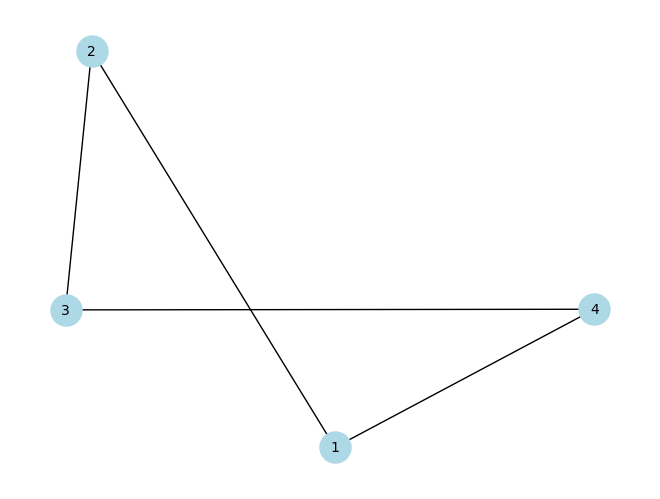

In [3]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Draw the graph
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.show()

## Advanced Visualization 

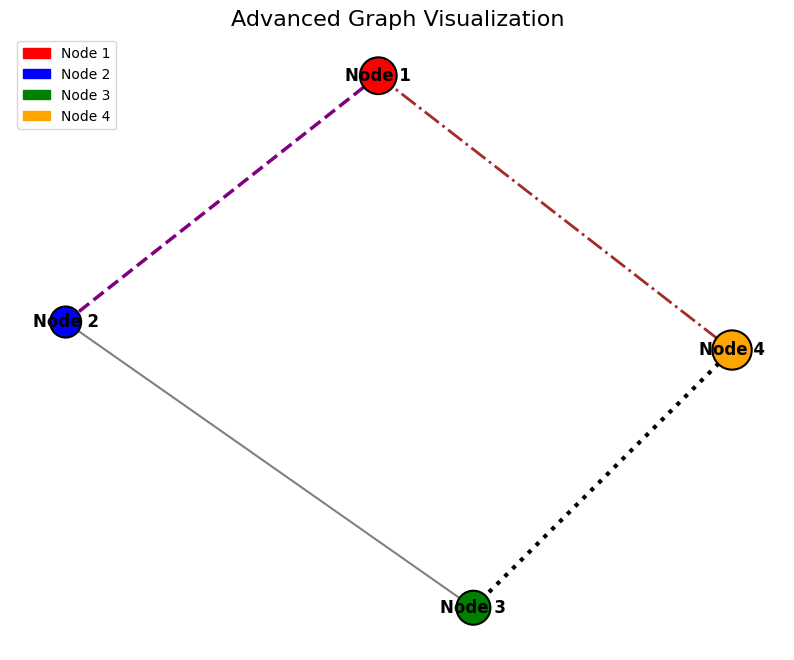

In [18]:

# Create a sample graph with attributes
G = nx.Graph()

# Add nodes with attributes
G.add_node(1, size=700, color='red', label='Node 1')
G.add_node(2, size=500, color='blue', label='Node 2')
G.add_node(3, size=600, color='green', label='Node 3')
G.add_node(4, size=800, color='orange', label='Node 4')

# Add edges with attributes
G.add_edge(1, 2, weight=2.5, color='purple', style='dashed')
G.add_edge(2, 3, weight=1.5, color='gray', style='solid')
G.add_edge(3, 4, weight=3.0, color='black', style='dotted')
G.add_edge(4, 1, weight=2.0, color='brown', style='dashdot')

# Generate positions for nodes using a spring layout
pos = nx.spring_layout(G)

# Extract node attributes for visualization
node_sizes = [G.nodes[node].get('size', 500) for node in G.nodes()]
node_colors = [G.nodes[node].get('color', 'lightblue') for node in G.nodes()]
node_labels = {node: G.nodes[node].get('label', str(node)) for node in G.nodes()}

# Extract edge attributes for visualization
edge_colors = [G.edges[edge].get('color', 'black') for edge in G.edges()]
edge_weights = [G.edges[edge].get('weight', 1.0) for edge in G.edges()]
edge_styles = [G.edges[edge].get('style', 'solid') for edge in G.edges()]

# Draw the graph
plt.figure(figsize=(10, 8))

# Draw nodes with custom sizes and colors
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, edgecolors='black', linewidths=1.5)

# Draw edges with custom colors, weights, and styles
for edge, color, weight, style in zip(G.edges(), edge_colors, edge_weights, edge_styles):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=weight, edge_color=color, style=style)

# Draw labels with custom font size
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=12, font_color='black', font_weight='bold')

# Add a title
plt.title("Advanced Graph Visualization", fontsize=16)

# Add a legend for node colors
import matplotlib.patches as mpatches
legend_elements = [
    mpatches.Patch(color='red', label='Node 1'),
    mpatches.Patch(color='blue', label='Node 2'),
    mpatches.Patch(color='green', label='Node 3'),
    mpatches.Patch(color='orange', label='Node 4')
]
plt.legend(handles=legend_elements, loc='upper left', fontsize=10)

# Remove axes for better visualization
plt.axis('off')

# Show the plot
plt.show()

## Compute Basic Graph Measurements

In [4]:
# Compute the degree of each node
degrees = dict(G.degree())
print("Degrees of nodes:", degrees)

# Compute the number of nodes and edges
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)

# Check if the graph is connected
is_connected = nx.is_connected(G)
print("Is the graph connected?", is_connected)

# Compute the shortest path between two nodes
shortest_path = nx.shortest_path(G, source=1, target=3)
print("Shortest path from node 1 to node 3:", shortest_path)

Degrees of nodes: {1: 2, 2: 2, 3: 2, 4: 2}
Number of nodes: 4
Number of edges: 4
Is the graph connected? True
Shortest path from node 1 to node 3: [1, 2, 3]


## Add Attributes to Nodes and Edges

In [6]:
# Add attributes to nodes
G.nodes[1]['color'] = 'red'
G.nodes[2]['color'] = 'blue'

# Add attributes to edges
G.edges[1, 2]['weight'] = 4
G.edges[2, 3]['weight'] = 2

# Access node and edge attributes
print("Node 1 attributes:", G.nodes[1])
print("Edge (1, 2) attributes:", G.edges[1, 2])

Node 1 attributes: {'color': 'red'}
Edge (1, 2) attributes: {'weight': 4}


## Save and Load the Graph

In [7]:
# Save the graph to a file
nx.write_gml(G, "graph.gml")

# Load the graph from the file
G_loaded = nx.read_gml("graph.gml")

# Verify the loaded graph
print("Loaded Graph Nodes:", G_loaded.nodes())
print("Loaded Graph Edges:", G_loaded.edges())

Loaded Graph Nodes: ['1', '2', '3', '4']
Loaded Graph Edges: [('1', '2'), ('1', '4'), ('2', '3'), ('3', '4')]


## Degree Distribution

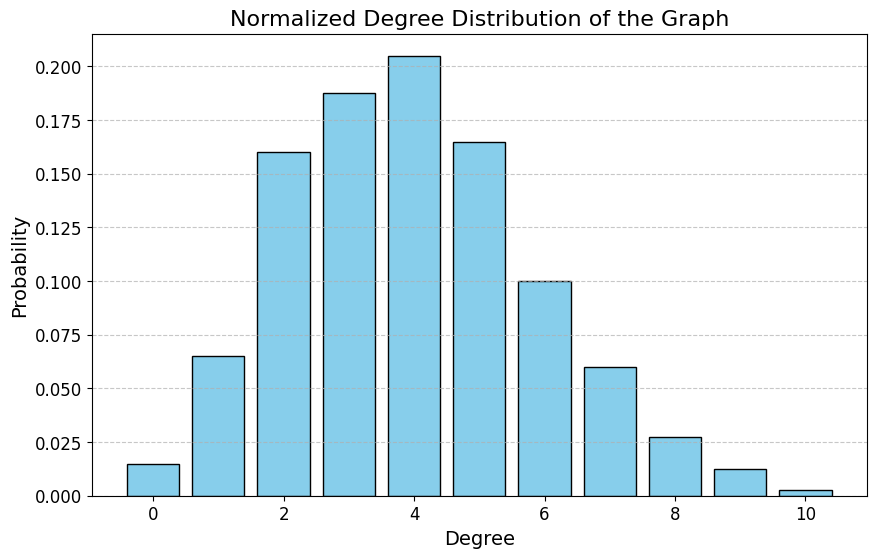

In [11]:
import random
import matplotlib.pyplot as plt

# Create a larger graph with 100 nodes and 300 random edges
num_nodes = 400
num_edges = 800
large_graph = nx.Graph()
large_graph.add_nodes_from(range(num_nodes))

# Add random edges
for _ in range(num_edges):
    u = random.randint(0, num_nodes - 1)
    v = random.randint(0, num_nodes - 1)
    if u != v:  # Avoid self-loops
        large_graph.add_edge(u, v)

# Compute the degree of each node
degree_sequence = [degree for _, degree in large_graph.degree()]

# Count the frequency of each degree
degree_counts = {}
for degree in degree_sequence:
    if degree in degree_counts:
        degree_counts[degree] += 1
    else:
        degree_counts[degree] = 1

# Normalize the degree counts to create a distribution
total_nodes = len(degree_sequence)
degree_distribution = {degree: count / total_nodes for degree, count in degree_counts.items()}

# Sort the degree distribution by degree
sorted_degrees = sorted(degree_distribution.items())  # (degree, probability) pairs
degrees, probabilities = zip(*sorted_degrees)

# Plot the normalized degree distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(degrees, probabilities, color='skyblue', edgecolor='black')
plt.title("Normalized Degree Distribution of the Graph", fontsize=16)
plt.xlabel("Degree", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()